In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, RANSACRegressor, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

Só vamos usar nesse notebook os dados escalonados

In [2]:
df = pd.read_csv('./melting-point/train_scaled.csv')

In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Regressor Linear

In [5]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print("R2 score:", lr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.6150131029637392
Mean Absolute error: 36.162050096312974


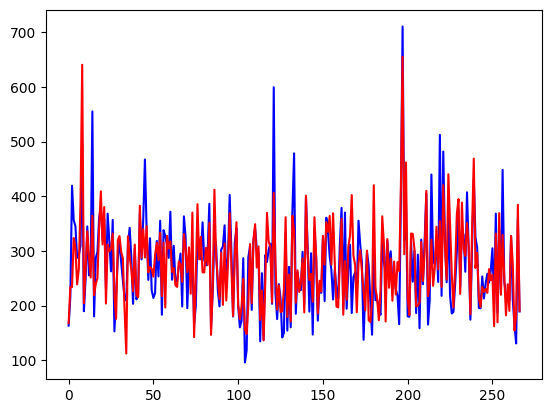

In [6]:
plt.plot(Y_test, c='blue')
plt.plot(pred, c='red')

plt.show()

In [7]:
lr_scores = cross_val_score(lr, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lr_scores)
print(lr_scores.mean())
print(lr_scores.std())

[-38.74998071 -36.20632623 -38.53538154 -34.89104344 -38.70670492
 -38.65037266 -38.22925677 -37.03798119 -38.49901032 -34.75738204]
-37.42634398141304
1.5200396883536131


# Ridge Regression

In [8]:
rg = RidgeCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.05, 0.005, 0.0025, 0.001, 0.00025), cv=10)

rg.fit(X_train, Y_train)
pred = rg.predict(X_test)

print(rg.alpha_)
print("R2 score:", rg.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

100.0
R2 score: 0.6236370556065878
Mean Absolute error: 35.78020662847758


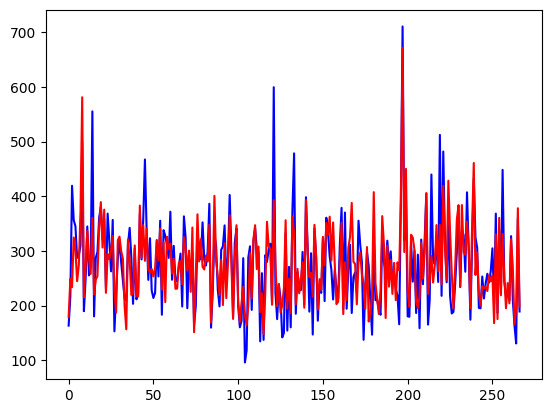

In [9]:
plt.plot(Y_test, c='blue')
plt.plot(pred, c='red')

plt.show()

In [10]:
rg_scores = cross_val_score(rg, melting_point['data'], melting_point['target'], cv=10, scoring="neg_mean_absolute_error")
print(rg_scores)
print(rg_scores.mean())
print(rg_scores.std())

[-39.26562613 -36.83857269 -38.51462276 -34.57590096 -37.85915929
 -38.20984231 -39.2043595  -37.30170964 -38.52195236 -33.83193234]
-37.41236779777763
1.764485224834347


# Lasso Regression

In [11]:
ls = LassoCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), cv=10, max_iter=10000)

ls.fit(X_train, Y_train)
pred = ls.predict(X_test)

print(ls.alpha_)
print("R2 score:", ls.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

0.1
R2 score: 0.6288043053371236
Mean Absolute error: 35.63625451523332


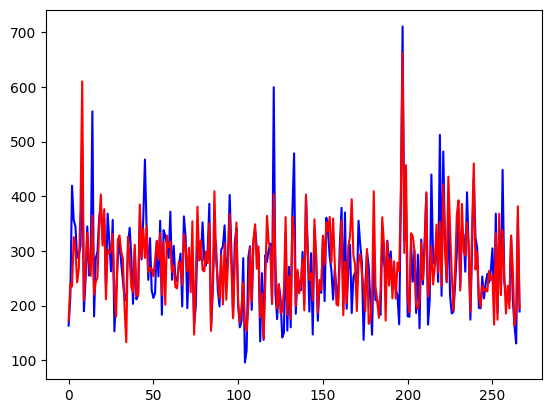

In [12]:
plt.plot(Y_test, c='blue')
plt.plot(pred, c='red')

plt.show()

In [13]:
ls_scores = cross_val_score(ls, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(ls_scores)
print(ls_scores.mean())
print(ls_scores.std())

[-38.43070326 -36.10792194 -38.32704689 -34.41129798 -38.10775904
 -38.16620221 -38.56627438 -36.98916568 -38.38738207 -34.07977897]
-37.157353241651066
1.629434155317617


# Elastic Net

In [14]:
encv = ElasticNetCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1),cv=10, max_iter=10000)

encv.fit(X_train, Y_train)
pred = encv.predict(X_test)

print(encv.alpha_)
print(encv.l1_ratio_)
print("R2 score:", encv.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+03, tolerance: 1.567e+03
  model = cd_fast.enet_coordinate_descent_gram(


0.1
0.75
R2 score: 0.6295266597757971
Mean Absolute error: 35.51244656598681


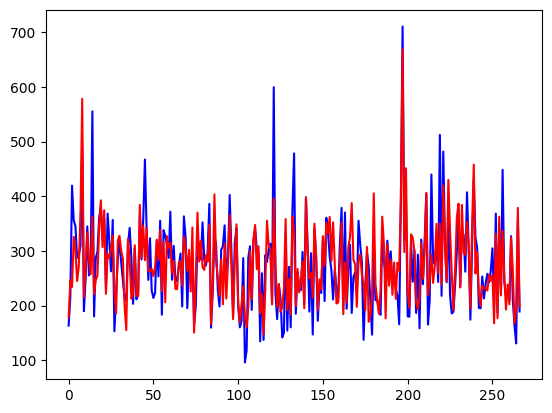

In [15]:
plt.plot(Y_test, c='blue')
plt.plot(pred, c='red')

plt.show()

In [16]:
encv_scores = cross_val_score(encv, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(encv_scores)
print(encv_scores.mean())
print(encv_scores.std())

D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+03, tolerance: 1.538e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e+03, tolerance: 1.562e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.784e+03, tolerance: 1.571e+03
  model

[-39.06598639 -36.62170656 -38.35866369 -34.35404327 -37.78278616
 -37.99614127 -39.02542482 -37.55196082 -38.4225299  -33.79279102]
-37.29720339021226
1.75205593429497


# RANSAC

In [17]:
rs = RANSACRegressor()

rs.fit(X_train, Y_train)
pred = rs.predict(X_test)

print("R2 score:", rs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.3103723752862173
Mean Absolute error: 43.034600422857416


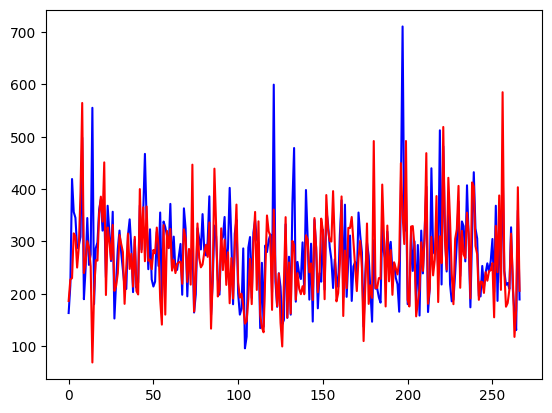

In [18]:
plt.plot(Y_test, c='blue')
plt.plot(pred, c='red')

plt.show()

In [19]:
rs_scores = cross_val_score(rs, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(rs_scores)
print(rs_scores.mean())
print(rs_scores.std())

[-46.52260646 -39.84922946 -42.9130311  -40.84277455 -47.98766472
 -54.28928626 -48.15954335 -44.32799798 -45.04382641 -41.75363028]
-45.16895905674842
4.079134422372751


# Huber Regression

In [20]:
hr = HuberRegressor(epsilon=2.0, max_iter=1000)

hr.fit(X_train, Y_train)
pred = hr.predict(X_test)

print("R2 score:", hr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.4228303102914417
Mean Absolute error: 39.00477588504286


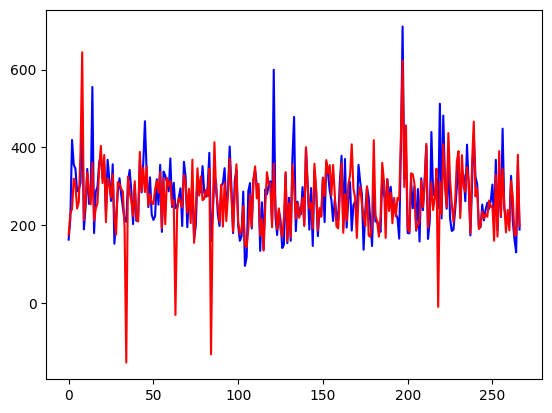

In [21]:
plt.plot(Y_test, c='blue')
plt.plot(pred, c='red')

plt.show()

In [22]:
hr_scores = cross_val_score(hr, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(hr_scores)
print(hr_scores.mean())
print(hr_scores.std())

[-41.81431791 -43.40913058 -42.0114501  -38.13473252 -42.23431978
 -42.22017779 -49.70041935 -42.34806434 -40.35855245 -40.18371325]
-42.24148780604314
2.8616712898207712


# Leaderboard

In [23]:
modelos = {
    "Regressor Linear": lr_scores,
    "Ridge": rg_scores,
    "Lasso": ls_scores,
    "ElasticNet": encv_scores,
    "RANSAC": rs_scores,
    "Huber": hr_scores
}

In [24]:
resultados = []
for nome, score in modelos.items():
    resultados.append({
        "Modelo": nome,
        "Média do Score": score.mean(),
        "Desvio Padrão": score.std()
    })

leaderboard = pd.DataFrame(resultados).sort_values(by="Média do Score", ascending=False)
leaderboard.reset_index(drop=True, inplace=True)

display(leaderboard.style.background_gradient(cmap="Greens").format({"Média do Score": "{:.4f}", "Desvio Padrão": "{:.4f}"}))